In [661]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', 150) 
pd.set_option('display.max_rows', 300)

## Importo dataset

In [662]:
df_subvencions = pd.read_csv('../data/Subvencions_atorgades_AjuntBCN_i_Instituts.csv')

In [663]:
df_subvencions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61696 entries, 0 to 61695
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entitat_Municipal        61696 non-null  object 
 1   Organ_Gestor             54915 non-null  object 
 2   Beneficiari              61696 non-null  object 
 3   NIF_CIF                  61696 non-null  object 
 4   Tipologia_De_Subvencio   61132 non-null  object 
 5   Codi_De_Subvencio        61696 non-null  object 
 6   Objecte                  61696 non-null  object 
 7   Data_Convocatoria        61696 non-null  object 
 8   Data_Atorgament          61696 non-null  object 
 9   Import_Sollicitat        61696 non-null  float64
 10  Import_Total_Projecte    61696 non-null  float64
 11  Import_Atorgat_Inicial   61696 non-null  float64
 12  Import_Reintegrat_Total  61696 non-null  float64
dtypes: float64(4), object(9)
memory usage: 6.1+ MB


In [664]:
print(df_subvencions.shape) # compruebo tamaño
df_subvencions.head(2) #imprimo para revisar su presentación

(61696, 13)


,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total
0,Ajuntament de Barcelona,"Gerència Drets de Ciutadania, Participació i T...",ASSOCIACIO UCRAINESA DJERELO,G65874968,CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019.DRETS...,19S00465,V Ucrania Fest,24.01.2019,16.09.2019,5000.0,14900.0,4500.0,0.0
1,Ajuntament de Barcelona,Gerència de Drets Socials,PROJECTE DELS NOMS - HISPANOSIDA,G60396280,CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019. GERÈ...,19S00469,26è Memorial Internacional de la Sida,24.01.2019,12.09.2019,4000.0,13000.0,3000.0,0.0


In [665]:
df_subvencions.describe().T # Reviso las variables numericas

,count,mean,std,min,25%,50%,75%,max
Import_Sollicitat,61696.0,32622.580025,1.188566e+06,0.0,1000.0,3200.000,9000.0,1.620830e+08
Import_Total_Projecte,61696.0,37172.735972,6.939191e+05,0.0,1500.0,6412.705,20000.0,1.506817e+08
Import_Atorgat_Inicial,61696.0,117470.655703,2.112606e+06,-4700000.0,1000.0,2250.000,6000.0,1.607830e+08
Import_Reintegrat_Total,61696.0,106.704832,5.104336e+03,0.0,0.0,0.000,0.0,1.185303e+06


In [666]:
df_subvencions.describe(include=object).T #Reviso las variables objeto

,count,unique,top,freq
Entitat_Municipal,61696,12,Ajuntament de Barcelona,46213
Organ_Gestor,54915,48,"Gerència d’Àrea d’Economia, Recursos i Promoci...",9349
Beneficiari,61696,25247,INST. MPAL. CULTURA (ICUB),220
NIF_CIF,61696,18885,P5890006I,225
Tipologia_De_Subvencio,61132,260,AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...,5795
Codi_De_Subvencio,61696,49175,23S00061,7
Objecte,61696,34016,POCS RECURSOS 2019,5795
Data_Convocatoria,61696,112,00.00.0000,27889
Data_Atorgament,61696,1339,17.12.2019,5821


## Reviso Duplicados y nulos

In [667]:
df_subvencions[df_subvencions.duplicated(keep=False)] # verifico presencia de duplicados

,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total


In [668]:
df_subvencions.isnull().sum() # observo nulos en "Organ_Gestor", "Tipologia_De_Subvencio"

Entitat_Municipal             0
Organ_Gestor               6781
Beneficiari                   0
NIF_CIF                       0
Tipologia_De_Subvencio      564
Codi_De_Subvencio             0
Objecte                       0
Data_Convocatoria             0
Data_Atorgament               0
Import_Sollicitat             0
Import_Total_Projecte         0
Import_Atorgat_Inicial        0
Import_Reintegrat_Total       0
dtype: int64

## Manejo los nulos de la mejor manera

In [669]:
df_subvencions[df_subvencions['Organ_Gestor'].isnull()] # impresión simple de los nulos presentes

,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total
640,Institut Municipal d'Educació,NaN,NATALIA ANGLES I BERNAL,48023217E,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00158,BECA FP DUAL NATALIA ANGLES I BERNAL 2020-2021,00.00.0000,20.11.2020,2521.13,2521.13,2521.13,0.0
641,Institut Municipal d'Educació,NaN,BERTA ARIAS RUESGA,49292612R,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00159,BECA FP DUAL BERTA ARIAS RUESGA 2020-2021,00.00.0000,20.11.2020,2521.13,2521.13,2499.44,0.0
642,Institut Municipal d'Educació,NaN,DEIDRE ATIENZAR CEBRIA,26068801A,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00160,BECA FP DUAL DEIDRE ATIENZAR CEBRIA 2020-2021,00.00.0000,20.11.2020,2521.13,2521.13,1161.02,0.0
643,Institut Municipal d'Educació,NaN,ARIADNA BIETO I ESTRELLA,23922664L,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00161,BECA FP DUAL ARIADNA BIETO ESTRELLA 2020-2021,00.00.0000,20.11.2020,2521.13,2521.13,1286.21,0.0
644,Institut Municipal d'Educació,NaN,CABRERA CORONADO,26910572C,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00162,BECA FP DUAL SHEYLA CABRERA CORONADO 2020-2021,00.00.0000,20.11.2020,2521.13,2521.13,2480.79,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61691,Institut Municipal Barcelona Esports,NaN,CLUB NATACION BARCELONA,G08533689,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00988,Convocatòria subv entitats esportives - COVID,00.00.0000,31.12.2020,25000.00,25000.00,25000.00,0.0
61692,Institut Municipal Barcelona Esports,NaN,REAL CLUB DE TENIS BARCELONA-1899,G08555278,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00989,Convocatòria subv entitats esportives - COVID,00.00.0000,31.12.2020,25000.00,25000.00,25000.00,0.0
61693,Institut Municipal Barcelona Esports,NaN,Unió Esportiva d'Horta,G08675738,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00991,Convocatòria subv entitats esportives - COVID,00.00.0000,31.12.2020,18993.41,18993.41,18993.41,0.0
61694,Institut Municipal Barcelona Esports,NaN,Fed Esp Cat Paralítics Cerebrals,G60121043,SUBVENCIONS DIRECTES (amb o sense CONVENI),21S00311,Conveni DIBA 2020 - Esdeveniments,00.00.0000,06.05.2021,5000.00,5000.00,5000.00,0.0


### Evaluo reemplazar los nulos por "no_gestor" para ver su comportamiento 

In [670]:
df = df_subvencions.copy()

In [671]:
df['Organ_Gestor'].fillna('no_gestor', inplace=True)

C:\Users\harol\AppData\Local\Temp\ipykernel_12012\741646457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Organ_Gestor'].fillna('no_gestor', inplace=True)


In [672]:
df.groupby(['Entitat_Municipal','Organ_Gestor'])['Organ_Gestor'].count()

Entitat_Municipal                                           Organ_Gestor                                                         
Ajuntament de Barcelona                                     Districte d'Horta-Guinardó                                               1559
                                                            Districte de Ciutat Vella                                                1602
                                                            Districte de Gràcia                                                      1131
                                                            Districte de Nou Barris                                                  1300
                                                            Districte de Sant Andreu                                                 1328
                                                            Districte de Sant Martí                                                  1477
                                          

### Después de observar a detalle la distribuciób observo que los "no gestor" son parte de la misma entidad municipal, así que cambiaré los nulos por la misma entidad

In [673]:
df_subvencions['Organ_Gestor'] = df_subvencions['Organ_Gestor'].fillna(df_subvencions['Entitat_Municipal'])

In [674]:
# convierto a minúsculas
print(df_subvencions['Organ_Gestor'].shape)
df_subvencions['Organ_Gestor'] = df_subvencions['Organ_Gestor'].apply(lambda x: x.lower())
print(df_subvencions['Organ_Gestor'].shape)

(61696,)
(61696,)


In [675]:
df_subvencions.groupby(['Entitat_Municipal','Organ_Gestor'])['Organ_Gestor'].count()

Entitat_Municipal                                           Organ_Gestor                                                         
Ajuntament de Barcelona                                     ajuntament de barcelona                                                   215
                                                            districte d'horta-guinardó                                               1559
                                                            districte de ciutat vella                                                1602
                                                            districte de gràcia                                                      1131
                                                            districte de l'eixample                                                  1288
                                                            districte de les corts                                                    654
                                          

In [676]:
df_subvencions['Organ_Gestor'] = df_subvencions['Organ_Gestor'].replace('gerencia municipal', 'gerència municipal')
df_subvencions['Organ_Gestor'] = df_subvencions['Organ_Gestor'].replace("gerència d'àrea d'agenda 2030, transició digital,", "gerència d'àrea d'agenda 2030, transició digital i esports")

In [677]:
df_subvencions.groupby(['Entitat_Municipal','Organ_Gestor'])['Organ_Gestor'].count()

Entitat_Municipal                                           Organ_Gestor                                                         
Ajuntament de Barcelona                                     ajuntament de barcelona                                                   215
                                                            districte d'horta-guinardó                                               1559
                                                            districte de ciutat vella                                                1602
                                                            districte de gràcia                                                      1131
                                                            districte de l'eixample                                                  1288
                                                            districte de les corts                                                    654
                                          

### Analizo la distribucion del organo gestor dentro del ayuntamiento 

In [678]:
#En el ayuntamiento de Barcelona hay varidad de gerencias
df = df_subvencions[df_subvencions['Entitat_Municipal']=='ajuntament de barcelona']['Organ_Gestor'].value_counts().to_frame()

In [679]:
df1 = df_subvencions[df_subvencions['Entitat_Municipal']!='ajuntament de barcelona ']['Organ_Gestor'].value_counts(normalize=True).to_frame()
df1['acumulado'] = df1['proportion'].cumsum()
df1

,proportion,acumulado
Organ_Gestor,,
"gerència d’àrea d’economia, recursos i promoció econòmica",0.151533,0.151533
institut de cultura de barcelona,0.104966,0.256500
gerència de presidència i economia,0.098418,0.354918
institut municipal barcelona esports,0.058334,0.413252
"gerència àrea d.socials,salut,cooperac. i comunit.",0.055060,0.468312
"gerència drets de ciutadania, participació i transparència",0.052499,0.520812
"gerència àrea cultura,educació,esports i cicles v.",0.035869,0.556681
"gerència d'area de drets socials, justícia global, feminismes i lgtbi",0.029856,0.586537
districte de ciutat vella,0.025966,0.612503


In [680]:
lista_gestor_menor_porcentaje10 = list(df1[df1['acumulado']>0.90].reset_index()['Organ_Gestor'].unique())

In [681]:
df_subvencions['Organ_Gestor'] = df_subvencions['Organ_Gestor'].replace(lista_gestor_menor_porcentaje10, 'otras gerencias de barcelona')

### Tipología de subvención

In [682]:
df_subvencions['Tipologia_De_Subvencio'].value_counts(normalize=True)

Tipologia_De_Subvencio
AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A PERSONES AMB POCS     0.094795
AJUTS                                                               0.089658
SUBVENCIONS DIRECTES (amb o sense CONVENI)                          0.082952
PROJ. INVERS. ESTABLIMENTS ECON. LOCAL CONCURRÈNCIA NO COMPETITI    0.045017
TRANSFERÈNCIES ENS PÚBLICS I ALTRES                                 0.042580
SUBVENCIONS CONVOCATÒRIA                                            0.017569
CONVOCATÒRIA GENERAL DE SUBVENCIONS 2020. GERÈNCIA DRETS SOCIALS    0.011189
CONVOCATÒRIA GENERAL DE SUBVENCIONS 2024. ICUB                      0.011058
CONVOCATÒRIA GENERAL DE SUBVENCIONS 2021. ICUB                      0.010715
CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019.DRETS DE CIUTADANIA i P    0.010682
CONVOCATÒRIA GENERAL DE SUBVENCIONS 2023. ICUB                      0.010567
CONVOCATÒRIA GENERAL DE SUBVENCIONS 2021. GERÈNCIA DRETS SOCIALS    0.010567
CONVOCATÒRIA GENERAL DE SUBVENCIONS 2022. GERÈNCIA DR

In [683]:
df_subvencions['Tipologia_De_Subvencio'].nunique()

260

In [684]:
df = df_subvencions.copy()

In [685]:
df_subvencions[df_subvencions['Tipologia_De_Subvencio'].isnull()]

,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total
18782,Ajuntament de Barcelona,districte de ciutat vella,ASS CULTURAL I SOCIAL L'EM I JPC,G64031958,NaN,21S04964,Conveni col·laboració Projecte Ens Raval'EM,00.00.0000,21.10.2021,49630.0,50000.0,49630.0,0.0
18815,Ajuntament de Barcelona,"gerència d’àrea de cultura, educació, ciència ...",ASOC EXPANSION DE LA XARXA OBERTA,G65319832,NaN,21S05362,Conveni eXO.cat Xarxa Oberta inclusió digital,00.00.0000,28.06.2021,15075.4,15075.4,15075.4,0.0
18845,Ajuntament de Barcelona,"gerència d’àrea d’economia, recursos i promoci...",ASSOCIACIÓ CAMBRA LGTBIQ CATALUNYA,G64717812,NaN,21S05178,Promoció i dinamització BCN LGTBIQ (ACEGAL),00.00.0000,09.09.2021,66905.0,245735.0,116905.0,0.0
18846,Ajuntament de Barcelona,"gerència d'area de drets socials, justícia glo...",ASSOCIACIO SETEM CATALUNYA,G59523910,NaN,21S05179,Conveni Setem 2021,00.00.0000,08.07.2021,65000.0,130000.0,65000.0,0.0
18882,Ajuntament de Barcelona,"gerència d'area de drets socials, justícia glo...",ASSOC. CA LA DONA,G58505280,NaN,21S05210,Conveni Ca la Dona 2021,00.00.0000,01.07.2021,31050.0,34500.0,31050.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59845,Ajuntament de Barcelona,districte de gràcia,CERCLE DE GRÀCIA,G08534984,NaN,21S13098,Promoció Activitats Culturals Cercle Catòlic,00.00.0000,27.12.2021,13000.0,0.0,13000.0,0.0
60744,Ajuntament de Barcelona,"gerència d’àrea d’economia, recursos i promoci...",FUNDACIÓN SHIP2B,G66220286,NaN,22S08583,IX Ship2B Impact Forum,00.00.0000,29.09.2022,50000.0,404722.9,50000.0,0.0
60788,Ajuntament de Barcelona,"gerència d'area de drets socials, justícia glo...",PALLASSOS SENSE FRONTERES,G60343951,NaN,22S09646,PSF -Suport a infància refugiada i vulnerable ...,00.00.0000,27.12.2022,29900.0,55645.0,29900.0,0.0
60789,Ajuntament de Barcelona,"gerència d'area de drets socials, justícia glo...",FUNDACIO BARCELONACTUA,G66571746,NaN,22S09648,Conveni BCN Actua 2022,00.00.0000,22.12.2022,150000.0,187500.0,150000.0,0.0


In [686]:
df_subvencions['Tipologia_De_Subvencio'].fillna('no_tipo', inplace=True)

C:\Users\harol\AppData\Local\Temp\ipykernel_12012\4190768758.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_subvencions['Tipologia_De_Subvencio'].fillna('no_tipo', inplace=True)


In [687]:
tipo_subvencion_acumulado = df_subvencions['Tipologia_De_Subvencio'].value_counts(normalize=True).to_frame()

In [688]:
tipo_subvencion_acumulado['acumulado'] = tipo_subvencion_acumulado.cumsum()

In [689]:
tipo_subvencion_acumulado

,proportion,acumulado
Tipologia_De_Subvencio,,
AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A PERSONES AMB POCS,0.093928,0.093928
AJUTS,0.088839,0.182767
SUBVENCIONS DIRECTES (amb o sense CONVENI),0.082193,0.264960
PROJ. INVERS. ESTABLIMENTS ECON. LOCAL CONCURRÈNCIA NO COMPETITI,0.044606,0.309566
TRANSFERÈNCIES ENS PÚBLICS I ALTRES,0.042191,0.351757
SUBVENCIONS CONVOCATÒRIA,0.017408,0.369165
CONVOCATÒRIA GENERAL DE SUBVENCIONS 2020. GERÈNCIA DRETS SOCIALS,0.011087,0.380252
CONVOCATÒRIA GENERAL DE SUBVENCIONS 2024. ICUB,0.010957,0.391209
CONVOCATÒRIA GENERAL DE SUBVENCIONS 2021. ICUB,0.010617,0.401825


### Analizo lad otras variables

In [690]:
l_object = list(df_subvencions.describe(include=object).columns) # variables categóricas
l_number = list(df_subvencions.describe().columns) # variables numericas

In [691]:
l_object

['Entitat_Municipal',
 'Organ_Gestor',
 'Beneficiari',
 'NIF_CIF',
 'Tipologia_De_Subvencio',
 'Codi_De_Subvencio',
 'Objecte',
 'Data_Convocatoria',
 'Data_Atorgament']

### Entidad Municipal

In [692]:
df_subvencions['Entitat_Municipal'].value_counts()

Entitat_Municipal
Ajuntament de Barcelona                                       46213
Institut de Cultura de Barcelona                               6476
Institut Municipal Barcelona Esports                           3599
Institut Barcelona Esports                                     1201
Institut Municipal de persones amb Discapacitat                1060
Institut Municipal de Serveis Socials                           984
Institut Municipal d'Educació                                   603
Institut Municipal de Persones amb Discapacitat                 510
Institut Municipal del Paisatge Urbà i la Qualitat de Vida      386
Institut Municipal de Mercats de Barcelona                      292
Institut Municipal d' Hisenda                                   236
Institut Municipal d'Educació de Barcelona                      136
Name: count, dtype: int64

In [693]:
df_subvencions['Entitat_Municipal'] = df_subvencions['Entitat_Municipal'].apply(lambda x: x.lower())

### Beneficiario

- Observo dentro de los beneficiarios, personas así como  empresas y/o instituciones

In [694]:
df_subvencions['Beneficiari'].nunique()

25247

In [695]:
print(df_subvencions['Beneficiari'].shape)
df_subvencions['Beneficiari'] = df_subvencions['Beneficiari'].apply(lambda x: x.lower())
print(df_subvencions['Beneficiari'].shape)

(61696,)
(61696,)


In [696]:
df = df_subvencions.groupby(['Beneficiari'])['Codi_De_Subvencio'].count().to_frame()

In [697]:
df

,Codi_De_Subvencio
Beneficiari,
t'acompanyem,1
(espai abat cassià) parròquia de sant miquel del,1
albert mendieta caldentey,1
alejandra burciaga ramos,1
alfredo martinez alvarez,1
...,...
àldrich font roustan,1
àlex aubach i masip,1
àlex dominguez rodriguez,8


In [698]:
print(df.max())
print(df.min())

Codi_De_Subvencio    220
dtype: int64
Codi_De_Subvencio    1
dtype: int64


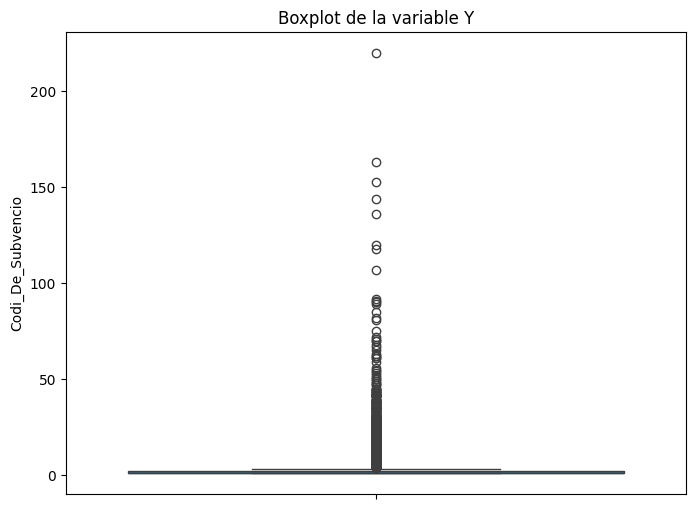

In [699]:
# Realizo un boxplot del número códigos de subvención por beneficiarios
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Codi_De_Subvencio') 
plt.title('Boxplot de la variable Y')
plt.show()

### CODIGO DE IDENTIFICACION

In [700]:
df_subvencions['NIF_CIF'].nunique()

18885

In [701]:
print(df_subvencions['NIF_CIF'].shape)
df_subvencions['NIF_CIF'] = df_subvencions['NIF_CIF'].apply(lambda x: x.lower())
df_subvencions['NIF_CIF'] = df_subvencions['NIF_CIF'].str.strip()
print(df_subvencions['NIF_CIF'].shape)

(61696,)
(61696,)


In [702]:
df_subvencions.groupby(['NIF_CIF'])['Codi_De_Subvencio'].count()

NIF_CIF
0000000005     4
0000000080    70
0000000081    39
0000000088    21
0000000098     6
              ..
z0414043w      1
z0701759b      1
z0809915k      1
z1053103f      1
zk3530580     38
Name: Codi_De_Subvencio, Length: 18885, dtype: int64

In [703]:
df = df_subvencions.groupby(['NIF_CIF'])['Codi_De_Subvencio'].count().to_frame()

In [704]:
print(df['Codi_De_Subvencio'].min())
print(df['Codi_De_Subvencio'].max())

1
225


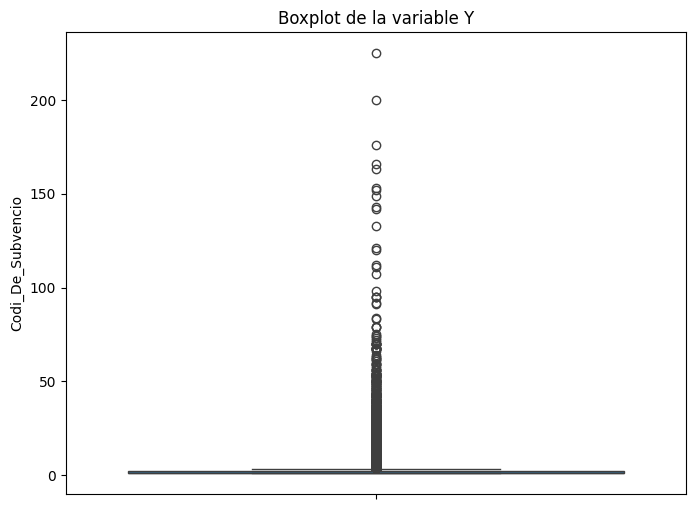

In [705]:
# Realizo un boxplot del número códigos de subvención por NIF_CIF
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Codi_De_Subvencio') 
plt.title('Boxplot de la variable Y')
plt.show()

### Codigo de subvención

In [706]:
df_subvencions['Codi_De_Subvencio'].nunique()

49175

In [707]:
print(df_subvencions['Codi_De_Subvencio'].shape)
df_subvencions['Codi_De_Subvencio'] = df_subvencions['Codi_De_Subvencio'].apply(lambda x: x.lower())
df_subvencions['Codi_De_Subvencio'] = df_subvencions['Codi_De_Subvencio'].str.strip()
print(df_subvencions['Codi_De_Subvencio'].shape)

(61696,)
(61696,)


In [708]:
list_codigo_subvencion = list(df_subvencions['Codi_De_Subvencio'].unique())

In [709]:
codigos_no_comunes_de_subvencion = []
for i in list_codigo_subvencion:
    if len(i)>8:
        codigos_no_comunes_de_subvencion.append(i)
    

In [710]:
len(codigos_no_comunes_de_subvencion )

619

In [711]:
df_subvencions[df_subvencions['Codi_De_Subvencio'].str.len() > 8]

,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total
2979,institut municipal del paisatge urbà i la qual...,otras gerencias de barcelona,montserrat vazquez ruiz,43514719f,SUBVENCIONS NO TELEMÀTIQUES,20212100003170,N.Expedient 2020-0003A Campanya 01PU,00.00.0000,20.12.2021,8996.22,8996.22,8996.22,0.0
2980,institut municipal del paisatge urbà i la qual...,otras gerencias de barcelona,estatges casadesus s.l.,b61209409,SUBVENCIONS NO TELEMÀTIQUES,20222200002438,"Exp. 2020-0000A. La Rambla, 123",00.00.0000,03.08.2022,27614.22,27614.22,27614.22,0.0
2981,institut municipal del paisatge urbà i la qual...,otras gerencias de barcelona,c prop cl bisbe laguarda 7 de bcn,h58719063,SUBVENCIONS NO TELEMÀTIQUES,20222200002440,"Exp. 2020-0002A. C.Bisbe la Guarda, 7",00.00.0000,03.08.2022,7540.76,7540.76,7540.76,0.0
3072,institut municipal d' hisenda,otras gerencias de barcelona,aida candelas espinar,71359857b,SUBVENCIONS NO TELEMÀTIQUES,20212200000103,FORMACIO DUAL,00.00.0000,01.10.2021,2058.67,2058.67,2058.67,0.0
3216,institut municipal del paisatge urbà i la qual...,otras gerencias de barcelona,clave denia sa,a03740966,SUBVENCIONS NO TELEMÀTIQUES,20191900001341,N.Expedient 2015-0625A Campanya 2015,00.00.0000,26.04.2019,4011.77,4011.77,4011.77,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56502,institut municipal d' hisenda,otras gerencias de barcelona,anyer moreno alcaraz,24414313c,SUBVENCIONS NO TELEMÀTIQUES,20242400002657,ESTUDIANT EN PRÀCTIQUES,00.00.0000,07.06.2024,3350.00,3350.00,3350.00,0.0
60040,institut municipal del paisatge urbà i la qual...,otras gerencias de barcelona,c.p. pl del padró 8-10,h62160981,SUBVENCIONS NO TELEMÀTIQUES,20242400000629,pagament subvenció 2022-0047A,00.00.0000,29.05.2024,28281.07,28281.07,28281.07,0.0
60041,institut municipal del paisatge urbà i la qual...,otras gerencias de barcelona,"cdad de prop de la cl carmen,76",h59072298,SUBVENCIONS NO TELEMÀTIQUES,20242400000625,pagament subvenció 2021-0343A,00.00.0000,29.05.2024,20236.43,20236.43,20236.43,0.0
60548,institut municipal del paisatge urbà i la qual...,otras gerencias de barcelona,cdad propietaris sagristans 3,h59985564,SUBVENCIONS NO TELEMÀTIQUES,00002400001655,2023-0045A. C/ SAGRISTANS 3,00.00.0000,00.00.0000,13366.04,13366.04,13366.04,0.0


### Objeto

In [712]:
df_subvencions['Objecte'].nunique()

34016

In [713]:
print(df_subvencions['Objecte'].shape)
df_subvencions['Objecte'] = df_subvencions['Objecte'].apply(lambda x: x.lower())
print(df_subvencions['Objecte'].shape)

(61696,)
(61696,)


In [714]:
df_subvencions['Objecte'].value_counts()

Objecte
pocs recursos 2019                                      5795
subvenció reactivació establiments economia local       2750
ajut del programa atenció a la dona víctima de viol.    2364
ajut del programa promoció i participació infància      1564
ajut del programa                                       1145
                                                        ... 
sistemes autoregeneratius setmana de l'arquit              1
áurea verd                                                 1
plantem la llavor                                          1
activitats de prom.de la bicicleta als actes               1
sostenibilit´art                                           1
Name: count, Length: 32397, dtype: int64

## Fecha de convocatoria y Fecha de otorgamiento 

In [715]:
print(df_subvencions['Data_Convocatoria'].nunique())
df_subvencions['Data_Convocatoria'].unique()

112


array(['24.01.2019', '01.06.2021', '10.06.2022', '22.06.2022',
       '24.11.2019', '12.05.2019', '01.07.2019', '25.06.2019',
       '11.07.2019', '04.07.2019', '07.02.2020', '17.03.2020',
       '02.06.2020', '01.04.2019', '05.07.2019', '20.06.2019',
       '28.10.2019', '20.11.2019', '08.11.2019', '31.12.2019',
       '20.01.2020', '00.00.0000', '22.07.2020', '26.06.2020',
       '03.07.2020', '02.07.2020', '12.08.2020', '09.08.2022',
       '01.06.2022', '17.05.2022', '03.08.2022', '01.09.2020',
       '28.08.2020', '23.03.2022', '03.05.2022', '04.04.2022',
       '02.08.2022', '25.01.2018', '20.07.2021', '04.02.2019',
       '27.11.2017', '05.01.2018', '05.02.2018', '15.01.2019',
       '14.12.2018', '20.05.2019', '17.04.2019', '14.05.2019',
       '29.04.2019', '23.05.2019', '05.06.2019', '30.12.2021',
       '12.06.2019', '30.12.2020', '09.07.2020', '04.08.2020',
       '18.02.2021', '31.03.2021', '26.03.2021', '09.04.2021',
       '06.04.2021', '23.07.2020', '26.11.2020', '15.06

In [716]:
df_subvencions['Data_Atorgament'].value_counts(normalize=True)

Data_Atorgament
17.12.2019    0.094350
30.07.2024    0.019239
27.12.2021    0.016338
05.08.2024    0.015560
03.07.2020    0.014847
                ...   
03.07.2024    0.000016
24.04.2019    0.000016
21.03.2024    0.000016
05.01.2024    0.000016
21.09.2021    0.000016
Name: proportion, Length: 1339, dtype: float64

In [717]:
print(df_subvencions['Data_Atorgament'].nunique())
df_subvencions['Data_Atorgament'].unique()

1339


array(['16.09.2019', '12.09.2019', '04.10.2019', ..., '04.09.2024',
       '12.07.2024', '14.08.2019'], dtype=object)

In [718]:
# Convierto fecha a tipo date time
df_subvencions['Data_Convocatoria'] = pd.to_datetime(df_subvencions['Data_Convocatoria'], format='%d.%m.%Y', errors='coerce')
df_subvencions['Data_Atorgament'] = pd.to_datetime(df_subvencions['Data_Atorgament'], format='%d.%m.%Y', errors='coerce')

## Importe solicitado

In [719]:
df_subvencions['Import_Sollicitat'].value_counts(normalize=True)

Import_Sollicitat
0.0       0.139847
1000.0    0.044428
3000.0    0.036388
1500.0    0.033633
6000.0    0.029143
            ...   
5047.2    0.000016
4475.0    0.000016
7967.0    0.000016
7912.0    0.000016
7525.0    0.000016
Name: proportion, Length: 13174, dtype: float64

In [720]:
len(df_subvencions[df_subvencions['Import_Sollicitat']<=0])

8628

In [721]:
len(df_subvencions[df_subvencions['Import_Sollicitat']<1])

8629

In [722]:
df_import_solicitado_diferente_cero = df_subvencions[~(df_subvencions['Import_Sollicitat']<1)] # para graficar

In [723]:
print(df_import_solicitado_diferente_cero['Import_Sollicitat'].min())
print(df_import_solicitado_diferente_cero['Import_Sollicitat'].max())

1.0
162082995.0


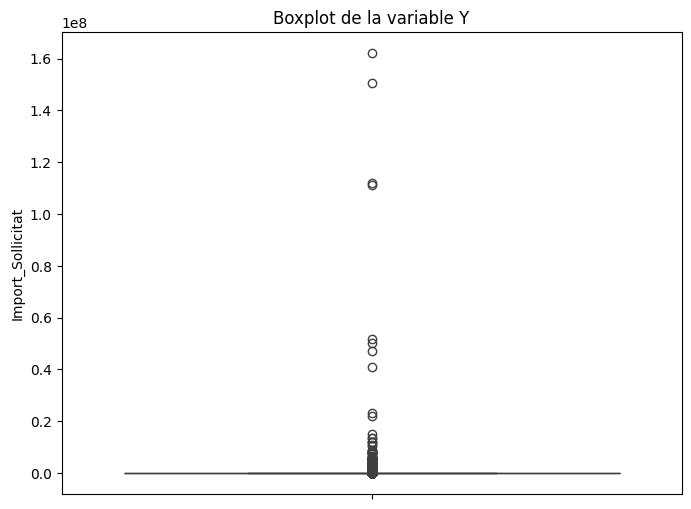

In [724]:
#Grafico de los importes solicitados
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_import_solicitado_diferente_cero, y='Import_Sollicitat') 
plt.title('Boxplot de la variable Y')
plt.show()

In [725]:
print(len(df_import_solicitado_diferente_cero[df_import_solicitado_diferente_cero['Import_Sollicitat']>100000]))
print(len(df_import_solicitado_diferente_cero[df_import_solicitado_diferente_cero['Import_Sollicitat']<=100000]))
df = df_import_solicitado_diferente_cero[df_import_solicitado_diferente_cero['Import_Sollicitat']<100000]

1247
51820


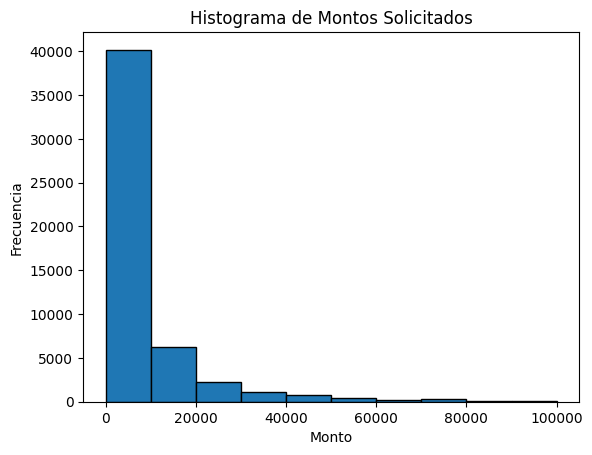

In [726]:
plt.hist(data=df, x='Import_Sollicitat',bins=10, edgecolor='black')

# Personalizar el histograma
plt.title('Histograma de Montos Solicitados')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [727]:
Q1 = df_import_solicitado_diferente_cero['Import_Sollicitat'].quantile(0.25)  # Primer cuartil (Q1)
Q2 = df_import_solicitado_diferente_cero['Import_Sollicitat'].quantile(0.50)  # Segundo cuartil (Q2) o mediana
Q3 = df_import_solicitado_diferente_cero['Import_Sollicitat'].quantile(0.75)  # Tercer cuartil (Q3)

In [728]:
IQ = Q3 -Q1
lim_sup = Q3 + 1.5*IQ
lim_inf = Q3 - 1.5*IQ

print(lim_sup)

print(lim_inf)

22449.4225
-2449.4225000000006


In [729]:
#len(df_import_solicitado_diferente_cero[df_import_solicitado_diferente_cero['Import_Sollicitat']>100])

## Importe otorgado inicial

In [730]:
## Observo valores negativos y liminamos menores que 0
print(len(df_subvencions[df_subvencions['Import_Atorgat_Inicial']<0])) 
df_subvencions.drop(df_subvencions[df_subvencions['Import_Atorgat_Inicial']<0].index, inplace=True)

35


In [731]:
df_subvencions[df_subvencions['Import_Atorgat_Inicial']<0]

,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total


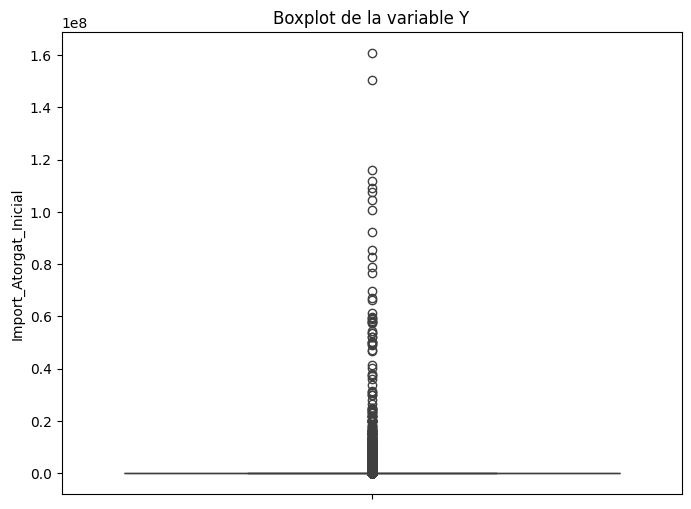

In [732]:
# Grafico de los importes otorgados inicialmente
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_subvencions, y='Import_Atorgat_Inicial') 
plt.title('Boxplot de la variable Y')
plt.show()

In [733]:
print(len(df_subvencions[df_subvencions['Import_Atorgat_Inicial']>100000]))
df = df_subvencions[df_subvencions['Import_Atorgat_Inicial']<=100000]

2345


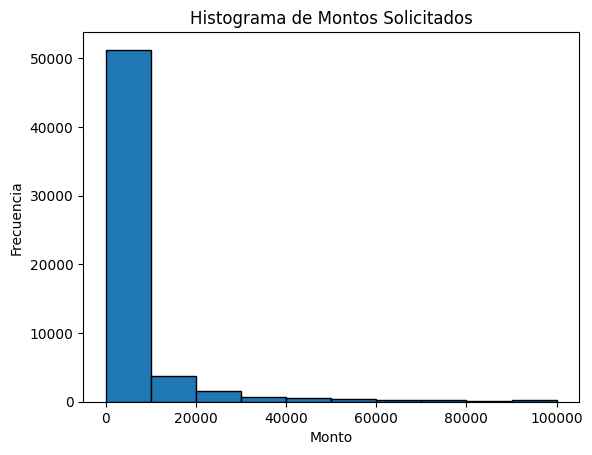

In [734]:
plt.hist(data=df, x='Import_Atorgat_Inicial',bins=10, edgecolor='black')

# Personalizar el histograma
plt.title('Histograma de Montos Solicitados')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

## Importe total proyectado

In [735]:
df_subvencions['Import_Total_Projecte'].value_counts(normalize=True)*100

Import_Total_Projecte
0.00         6.307066
6000.00      1.774217
3000.00      1.331474
1000.00      1.133618
10000.00     0.930896
               ...   
240948.00    0.001622
226072.39    0.001622
68307.04     0.001622
5336.10      0.001622
8406.00      0.001622
Name: proportion, Length: 27180, dtype: float64

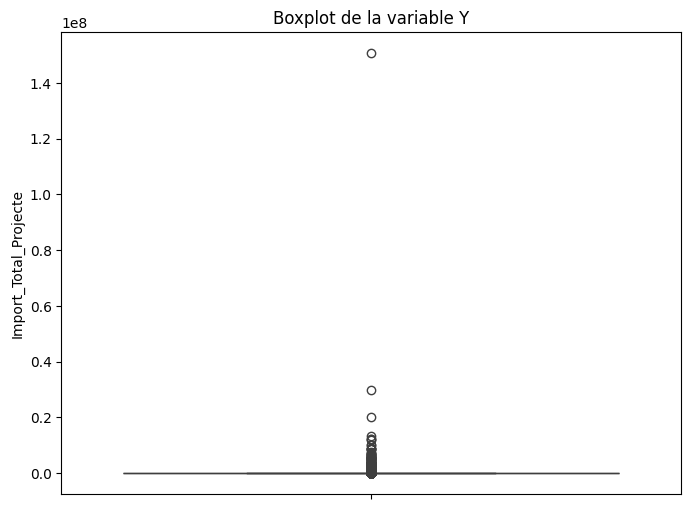

In [736]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_subvencions, y='Import_Total_Projecte') 
plt.title('Boxplot de la variable Y')
plt.show()

In [737]:
print(len(df_subvencions[df_subvencions['Import_Total_Projecte']>100000]))
df = df_subvencions[df_subvencions['Import_Total_Projecte']<100000]

3086


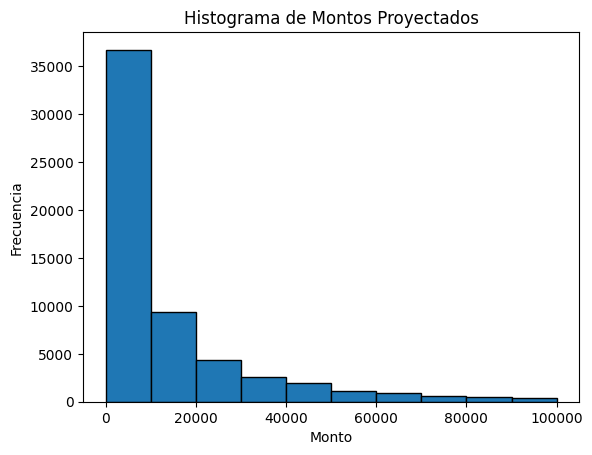

In [738]:
#Grafico de los montos proyectados
plt.hist(data=df, x='Import_Total_Projecte',bins=10, edgecolor='black')
plt.title('Histograma de Montos Proyectados')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

##  Importe reintegrado

In [739]:
df_subvencions['Import_Reintegrat_Total'].value_counts()

Import_Reintegrat_Total
0.00       59744
1000.00      143
1500.00       85
500.00        78
2000.00       69
           ...  
2032.50        1
2123.57        1
249.57         1
2867.70        1
215.61         1
Name: count, Length: 1128, dtype: int64

In [740]:
print(len(df_subvencions[df_subvencions['Import_Reintegrat_Total']<1]))
print(len(df_subvencions[df_subvencions['Import_Reintegrat_Total']>=1]))

59748
1913


In [741]:
df_subvencions['Import_Reintegrat_Total'].min()

np.float64(0.0)

In [742]:
# Agrupo los que son diferente a 0
df = df_subvencions[df_subvencions['Import_Reintegrat_Total']!=0]
print(df.shape) # es candidate a eliminarse, ya que solo tiene 1917 filas diferentes, de un total de 61000 aprox 

(1917, 13)


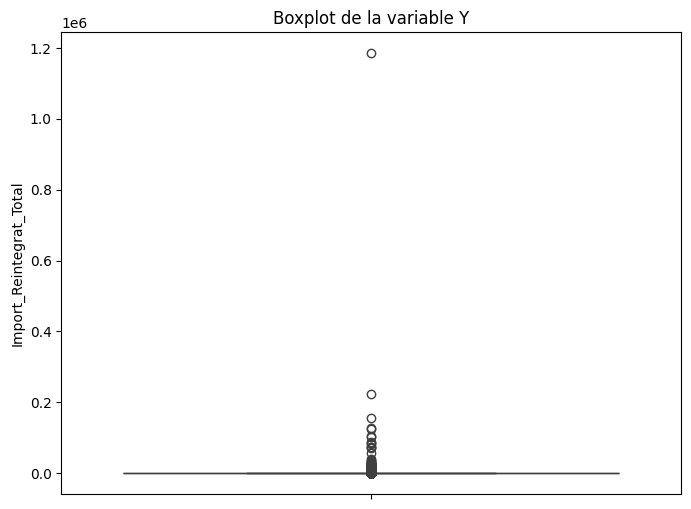

In [743]:
#Grafico de los importes reintegrados diferentes a "0"
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_subvencions, y='Import_Reintegrat_Total') 
plt.title('Boxplot de la variable Y')
plt.show()

In [744]:
print(len(df_subvencions[df_subvencions['Import_Reintegrat_Total']>=1000000]))
df = df_subvencions[(df_subvencions['Import_Reintegrat_Total']!=0)&(df_subvencions['Import_Reintegrat_Total']<100000)]

1


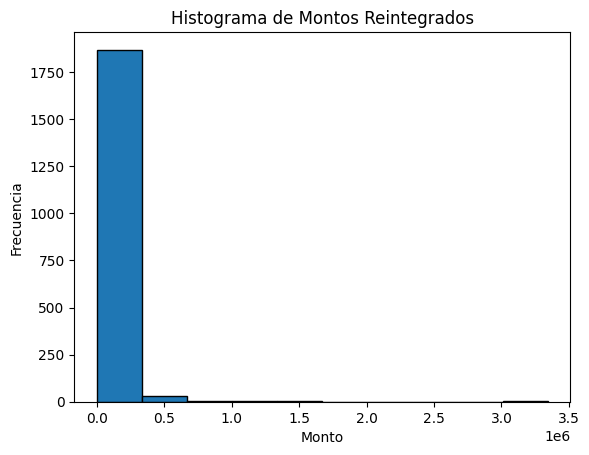

In [745]:
# Grafico de montos reintegrados
plt.hist(data=df, x='Import_Total_Projecte',bins=10, edgecolor='black')
plt.title('Histograma de Montos Reintegrados')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

## ANALISIS

- Una vez limpio las columnas empiezo a buscar insighs e información que rescatar

In [746]:
print(df_subvencions.shape)
df_subvencions.sample(1)

(61661, 13)


,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total
20243,institut de cultura de barcelona,institut de cultura de barcelona,ass cultural i social l'em i jpc,g64031958,CONVOCATÒRIA GENERAL DE SUBVENCIONS 2021. ICUB,21s03365,els llorers projecte musical,NaT,2021-08-04,4000.0,10560.0,2000.0,0.0


In [747]:
df_subvencions[['Data_Convocatoria', 'Data_Atorgament']]

,Data_Convocatoria,Data_Atorgament
0,2019-01-24,2019-09-16
1,2019-01-24,2019-09-12
2,2019-01-24,2019-10-04
3,2019-01-24,2019-07-09
4,2019-01-24,2019-09-12
...,...,...
61691,NaT,2020-12-31
61692,NaT,2020-12-31
61693,NaT,2020-12-31
61694,NaT,2021-05-06


In [748]:
print(df_subvencions.shape)
df_subvencions['Data_Convocatoria'] = pd.to_datetime(df_subvencions['Data_Convocatoria'], format='%d.%m.%Y', errors='coerce')
df_subvencions['Data_Atorgament'] = pd.to_datetime(df_subvencions['Data_Atorgament'], format='%d.%m.%Y', errors='coerce')

(61661, 13)


### Hay incoherencia en tener fechas negativas

In [749]:
df_subvencions['diferencia_dias'] = df_subvencions['Data_Atorgament']-df_subvencions['Data_Convocatoria']

In [750]:
df_subvencions['diferencia_dias'].describe() ## tenemos solo 33807 filas con  valores positivos

count                          33807
mean     224 days 21:45:36.817818796
std       61 days 02:11:10.273472194
min              -122 days +00:00:00
25%                181 days 00:00:00
50%                231 days 00:00:00
75%                260 days 00:00:00
max                758 days 00:00:00
Name: diferencia_dias, dtype: object

In [751]:
print(len(df_subvencions[df_subvencions['diferencia_dias']<'0 days'])) # tenemos 248 valores negativos, los eliminaré
#df_subvencions[df_subvencions['diferencia']<'0 days']

248


In [752]:
df_subvencions.drop(df_subvencions[df_subvencions['diferencia_dias']<'0 days'].index, inplace=True)

In [753]:
df_subvencions.sample()

,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total,diferencia_dias
19215,ajuntament de barcelona,districte de sant martí,grup barnaclub basquet,g58432584,CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019. SANT...,19s04805,formació humana a la practica esportiva del ba...,2019-01-24,2019-10-04,8500.0,117545.0,3000.0,0.0,253 days


In [754]:
df_subvencions['diferencia_dias'] = df_subvencions['diferencia_dias'].dt.days

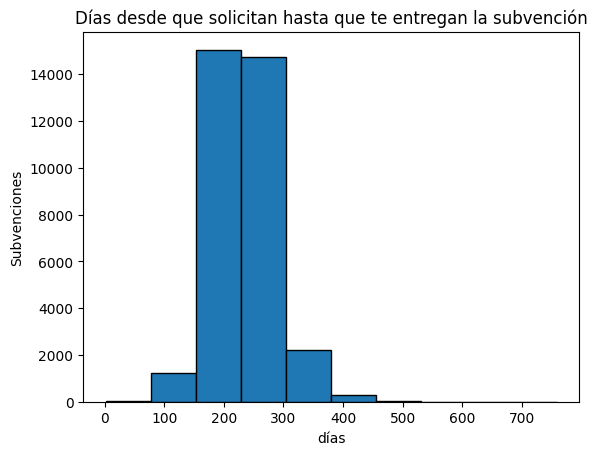

In [755]:
plt.hist(data=df_subvencions, x='diferencia_dias', edgecolor='black')

plt.title('Días desde que solicitan hasta que te entregan la subvención')
plt.xlabel('días')
plt.ylabel('Subvenciones')
plt.show()

### Ya revisado el grupo de variables numéricas en su momento observamos outaliers, considero que lo montos mayores a 100000 euros no entrarán en el análisis

In [756]:
print(df_subvencions[df_subvencions['Import_Atorgat_Inicial']>100000].shape) ##representa el 3.8% de los datos, lo elimino
df_subvencions.drop(df_subvencions[df_subvencions['Import_Atorgat_Inicial']>100000].index, inplace=True)

(2344, 14)


In [757]:
print(df_subvencions.shape)
df_subvencions.sample(1)

(59069, 14)


,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total,diferencia_dias
54137,ajuntament de barcelona,districte d'horta-guinardó,agrupacio cultural saudade,g08983256,CONVOCATÒRIA GENERAL DE SUBVENCIONS 2023. HORT...,23s01033,projecte d'informació - tradicions populars,NaT,2023-12-27,2500.0,5000.0,600.0,0.0,NaN


### ¿Qué institución recibió más subvenciones? nos basamos en el conteo de los códigos de subvención ya que si te entregaron un código es porque fuiste aprobado para recibirlo

In [758]:
df = df_subvencions.groupby(['Entitat_Municipal'])['Codi_De_Subvencio'].count().to_frame().sort_values(by='Codi_De_Subvencio',ascending=True)

<Figure size 800x500 with 0 Axes>

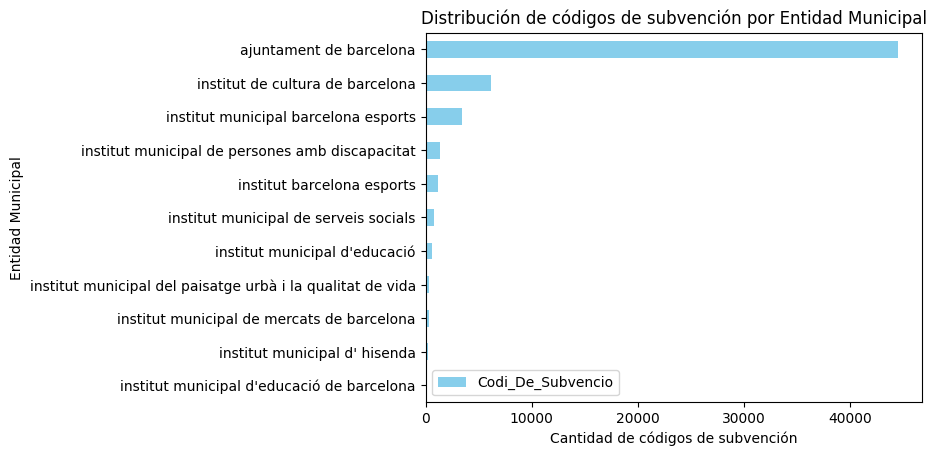

In [759]:
plt.figure(figsize=(8, 5))
df.plot(kind='barh', color='skyblue')

plt.xlabel('Cantidad de códigos de subvención')
plt.ylabel('Entidad Municipal')
plt.title('Distribución de códigos de subvención por Entidad Municipal')
plt.show()

In [760]:
# Por organo gestor
df = df_subvencions.groupby(['Organ_Gestor'])['Codi_De_Subvencio'].count().to_frame().sort_values(by='Codi_De_Subvencio',ascending=True)

<Figure size 800x500 with 0 Axes>

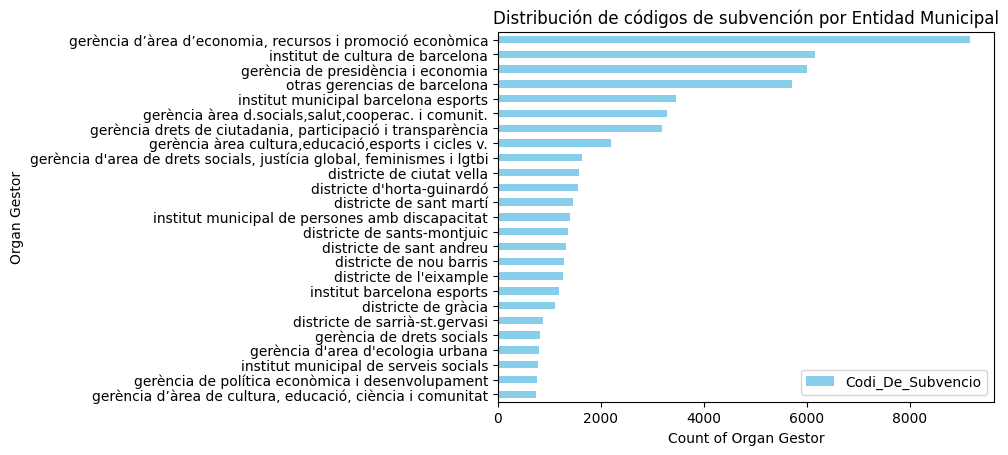

In [761]:
plt.figure(figsize=(8, 5))
df.plot(kind='barh', color='skyblue')

plt.title('Distribución de códigos de subvención por Entidad Municipal')
plt.xlabel('Count of Organ Gestor')
plt.ylabel('Organ Gestor')
plt.show()

### Cuanto suma el monto otorgado por entidad

In [762]:
# Sabemos que el ayuntamiento de Barcelona es el grupo más grande, así que lo excluimos para este análisis
df = df_subvencions[df_subvencions['Entitat_Municipal']!='ajuntament de barcelona'].groupby(['Entitat_Municipal'])['Import_Atorgat_Inicial'].sum().sort_values(ascending=True)

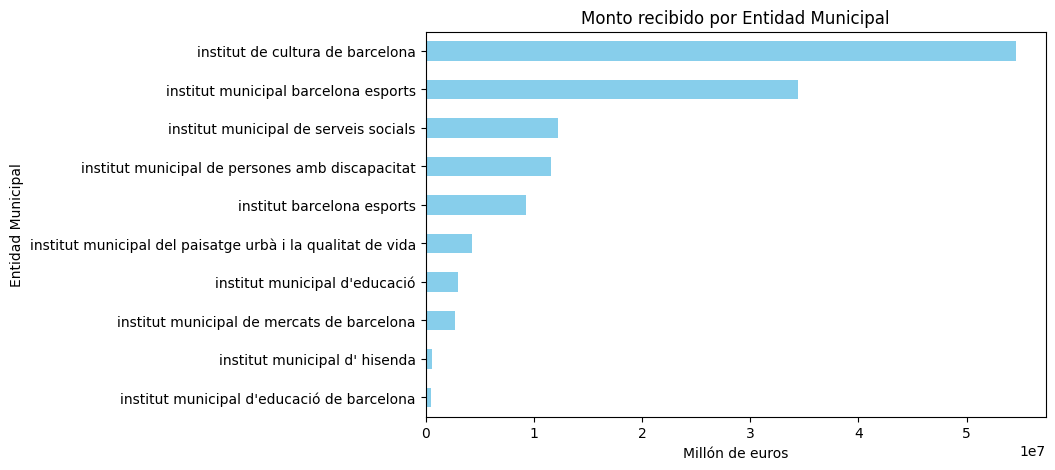

In [763]:
plt.figure(figsize=(8, 5))
df.plot(kind='barh', color='skyblue')

plt.title('Monto recibido por Entidad Municipal')
plt.xlabel('Millón de euros')
plt.ylabel('Entidad Municipal')
plt.show()

## ¿Cuántas personas y/o instituciones solicitaron subvención?

In [764]:
df = df_subvencions.groupby(['Organ_Gestor'])['NIF_CIF'].count().to_frame().sort_values(by='NIF_CIF',ascending=True)

<Figure size 800x500 with 0 Axes>

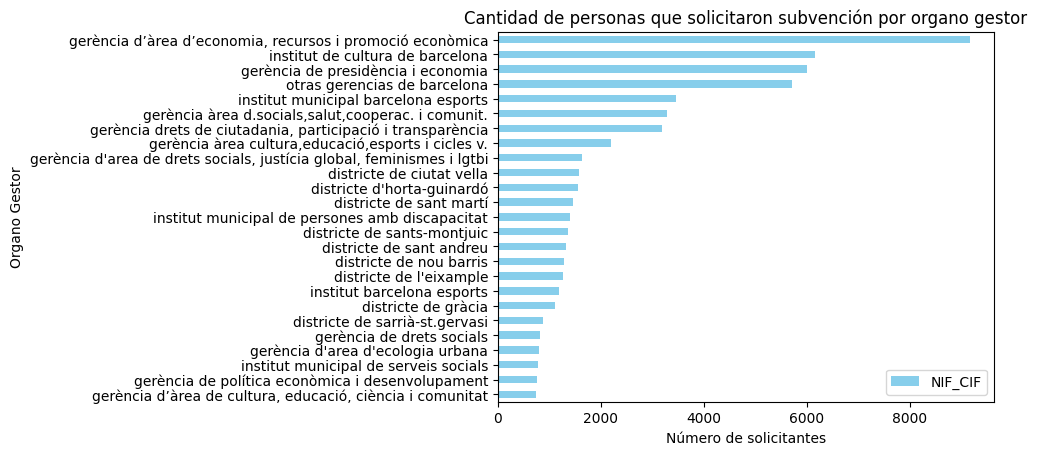

In [765]:
plt.figure(figsize=(8, 5))
df.plot(kind='barh', color='skyblue')

plt.title('Cantidad de personas que solicitaron subvención por organo gestor')
plt.xlabel('Número de solicitantes')
plt.ylabel('Organo Gestor')
plt.show()

## Analizo mis variables para poder incluirlas o no en un modelo

In [766]:
print(df_subvencions.shape)
df_subvencions.sample()

(59069, 14)


,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total,diferencia_dias
42278,institut de cultura de barcelona,institut de cultura de barcelona,fundació museu picasso de barcelona,g66008897,TRANSFERÈNCIES ENS PÚBLICS I ALTRES,23s03130,picasso - barcelona dibuixa 23,NaT,2023-04-24,0.0,0.0,50000.0,0.0,NaN


### Objecte no nos suma mucha información, así que no la considero, debido a su alta cardinalidad

In [767]:
print(df_subvencions['Objecte'].nunique())
df_subvencions.drop(columns=['Objecte'], axis=1, inplace=True) 

30359


### Sabemos que el nombre del beneficiario debe tener un identificador único que es NIF_CIF sin embargo no coinciden en el conteo total de ambas variables, así que las revisamos

In [768]:
df_subvencions[df_subvencions['NIF_CIF']=='08816778g']

,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total,diferencia_dias
3290,ajuntament de barcelona,"gerència d’àrea d’economia, recursos i promoci...","torres carvajal, maria jose",08816778g,Transformació Digital del Comerç 2020,20s06665,2020-07-22,2020-12-30,3177.86,6355.73,2348.33,166.74,161.0
15368,ajuntament de barcelona,"gerència d’àrea d’economia, recursos i promoci...","torres carvajal, maria jose",08816778g,TRANSFORMACIÓ DIGITAL DEL COMERÇ I LA RESTAURA...,22s06597,2022-05-03,2022-10-27,687.50,1375.00,687.50,0.00,177.0
51110,ajuntament de barcelona,"gerència d’àrea d’economia, recursos i promoci...",maria jose torres carvajal,08816778g,SUBVENCIONS PER A LA TRANSFORMACIÓ DIGITAL DEL...,23s05458,2023-03-07,2024-01-30,1806.49,3612.99,869.50,0.00,329.0


In [769]:
df = df_subvencions.groupby(['NIF_CIF'])['Beneficiari'].nunique().reset_index()

In [770]:
df_duplicates = df[df['Beneficiari'] > 1]
df_duplicates

,NIF_CIF,Beneficiari
31,01201741z,2
48,02916984d,2
99,05309043e,2
168,07545392n,2
231,08816778g,2
...,...,...
18634,y6221846s,2
18645,y6502367m,3
18675,y6931904v,2
18700,y7312537t,2


### Después de revisar las variables, solo podemos usar uno de ellos _NIF_CIF_, porque hay muchos errores ortográficos en la variable __Beneficiari__

In [778]:
df = df_subvencions.groupby(['NIF_CIF'])['Codi_De_Subvencio'].count().to_frame().sort_values('Codi_De_Subvencio', ascending=False)

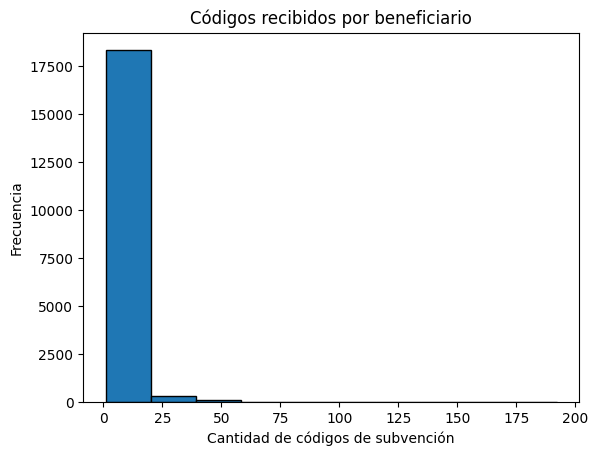

In [781]:
plt.hist(data=df, x='Codi_De_Subvencio', edgecolor='black')

plt.title('Códigos recibidos por beneficiario')
plt.xlabel('Cantidad de códigos de subvención')
plt.ylabel('Frecuencia')
plt.show()

### Evaluaré cuantas personas reciben más de un código de subvención

In [782]:
df = df.value_counts(normalize=True).to_frame()

In [783]:
df['acumualdo'] = df['proportion'].cumsum()

In [784]:
df = df_subvencions.groupby(['NIF_CIF'])['Codi_De_Subvencio'].count().to_frame()

In [785]:
df.loc[df['Codi_De_Subvencio'] >= 7, 'Codi_De_Subvencio'] = 'mas que 6'

C:\Users\harol\AppData\Local\Temp\ipykernel_12012\927568372.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'mas que 6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Codi_De_Subvencio'] >= 7, 'Codi_De_Subvencio'] = 'mas que 6'


In [786]:
df = df.value_counts().to_frame().sort_values(by='count',ascending=True)

In [787]:
df

,count
Codi_De_Subvencio,
5,477
6,495
4,527
3,785
2,1620
mas que 6,1839
1,13046


<Figure size 800x500 with 0 Axes>

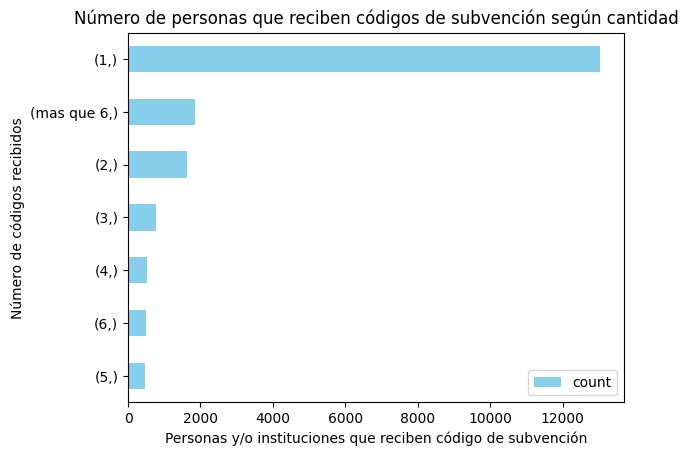

In [790]:
plt.figure(figsize=(8, 5))
df.plot(kind='barh', color='skyblue')

plt.title('Número de personas que reciben códigos de subvención según cantidad')
plt.xlabel('Personas y/o instituciones que reciben código de subvención')
plt.ylabel('Número de códigos recibidos')


plt.show()

In [791]:
# Dentro de la variable Import_Reintegrat_Total, mas del 95% es 0, candidata a eliminarla
len(df_subvencions[df_subvencions['Import_Reintegrat_Total']!=0.0])

1838

## Después de Revisar las distintas variables y encontrar insights, me quedo con 6 variables para realizar un modelo de Machine Learning 

In [792]:
df_modelo = df_subvencions[['Entitat_Municipal','Organ_Gestor','Import_Sollicitat','diferencia_dias','Import_Atorgat_Inicial', 'Import_Total_Projecte']]

In [793]:
print(df_modelo.shape)
df_modelo = df_modelo[~(df_modelo['diferencia_dias'].isnull())]

(59069, 6)


In [794]:
list_for_ohot = list(df_modelo.describe(include=object).columns)

In [795]:
list_numeric = list(df_modelo.describe().columns)

In [796]:
df_modelo = pd.get_dummies(df_modelo, columns=list_for_ohot, dtype=int)

In [797]:
minMaxResultado = MinMaxScaler()

In [798]:
df_modelo[list_numeric] = minMaxResultado.fit_transform(df_modelo[list_numeric])

In [799]:
corr = df_modelo.corr(numeric_only=True)

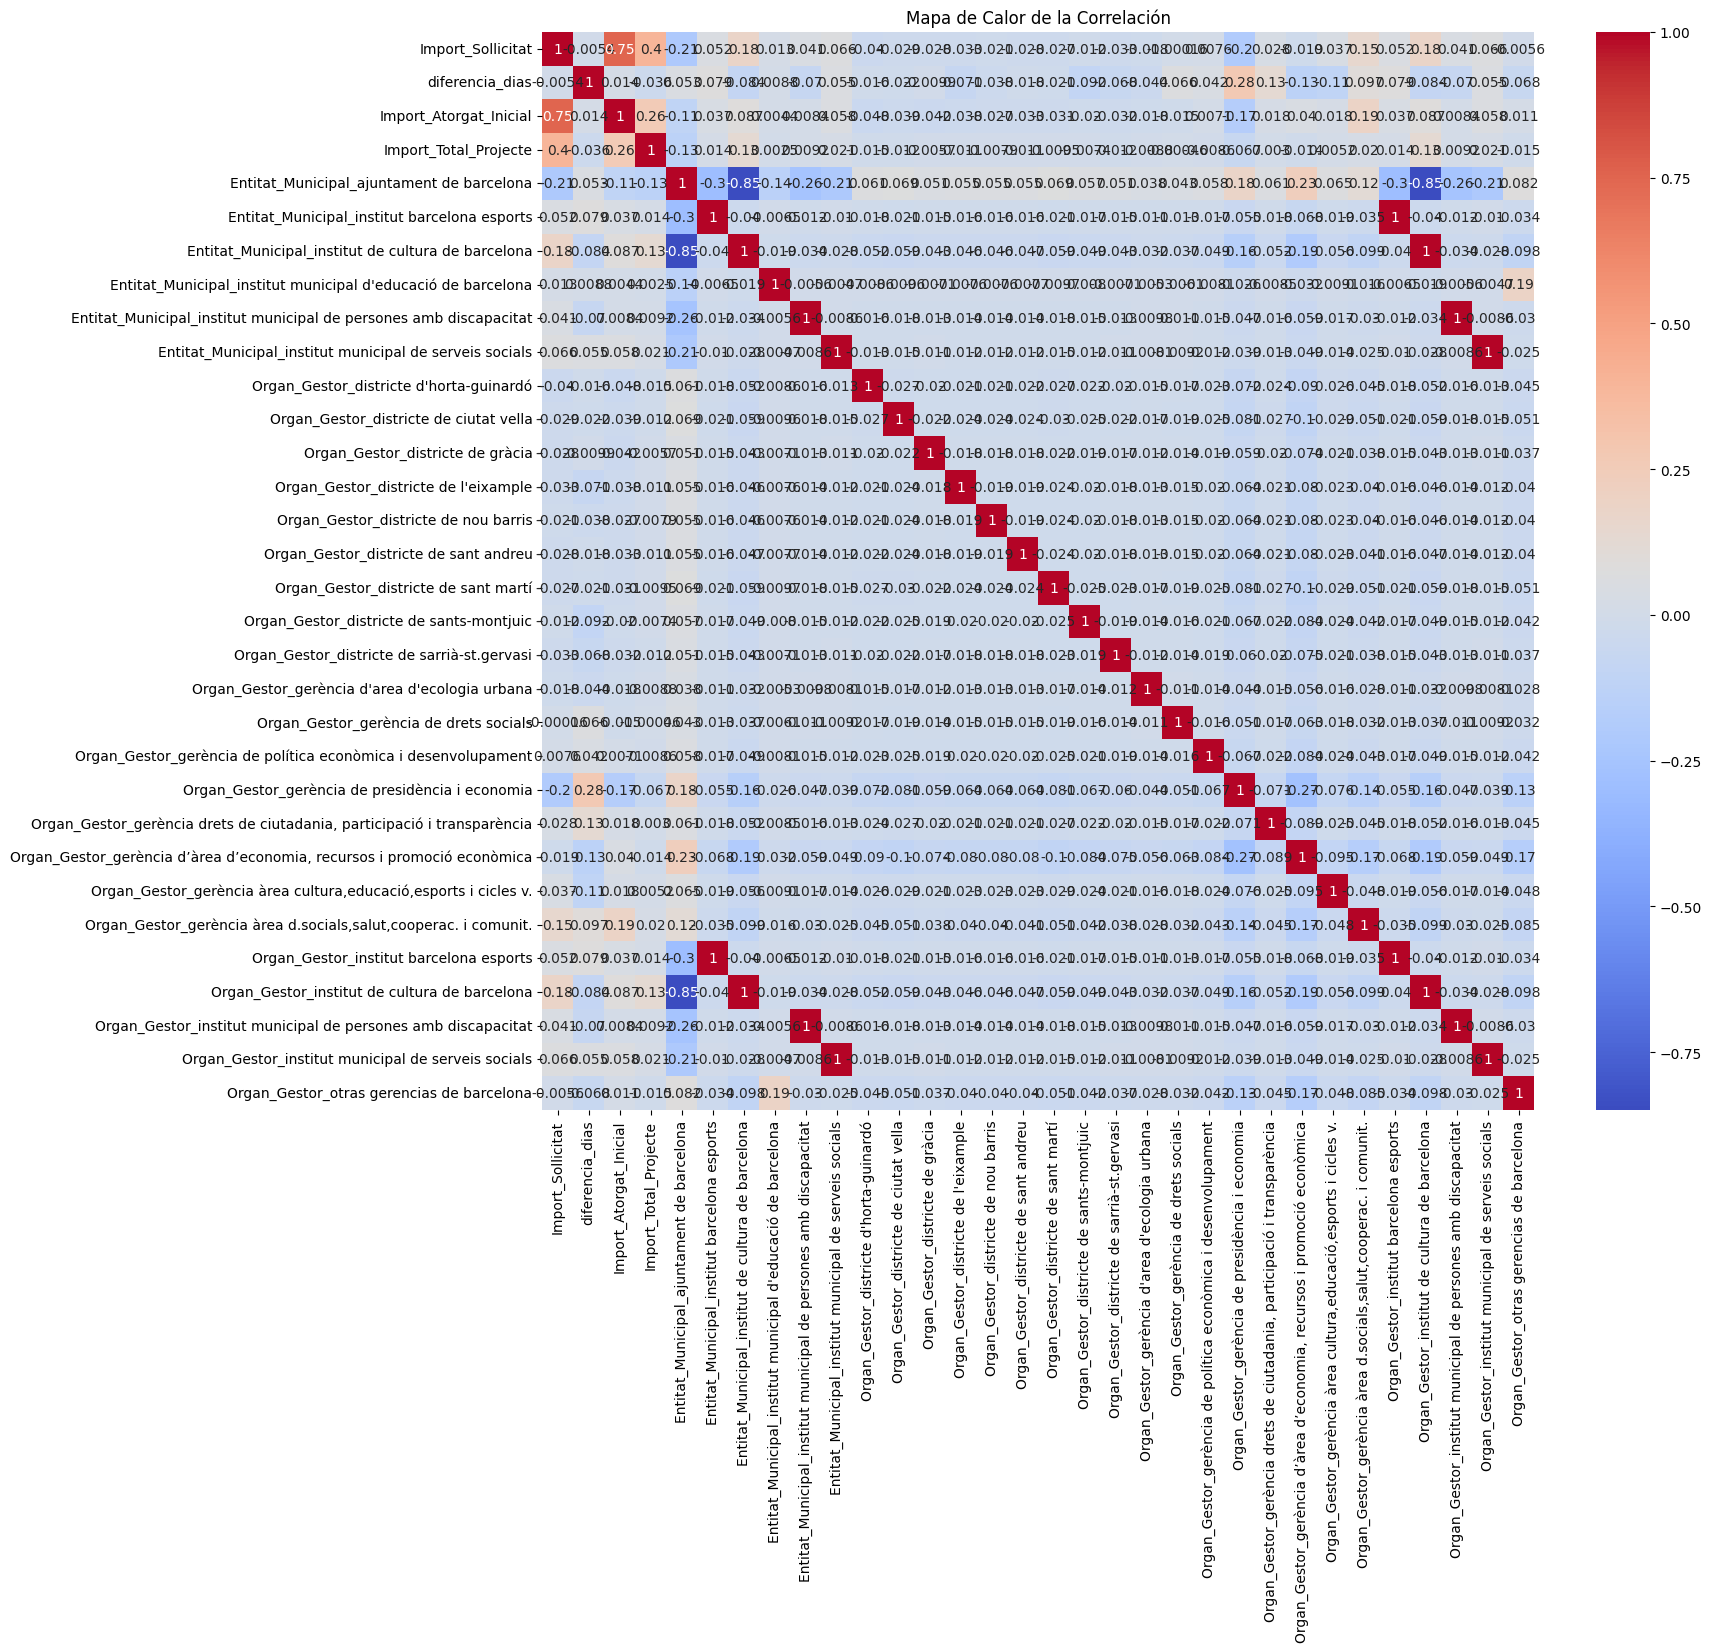

In [800]:
# Crear el heatmap usando la matriz de correlación
plt.figure(figsize=(16, 14))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.title('Mapa de Calor de la Correlación')
plt.show()

In [801]:
df_modelo.drop(columns=['Entitat_Municipal_institut barcelona esports','Entitat_Municipal_institut de cultura de barcelona'], axis=1, inplace=True)

In [802]:
df_modelo.head()

,Import_Sollicitat,diferencia_dias,Import_Atorgat_Inicial,Import_Total_Projecte,Entitat_Municipal_ajuntament de barcelona,Entitat_Municipal_institut municipal d'educació de barcelona,Entitat_Municipal_institut municipal de persones amb discapacitat,Entitat_Municipal_institut municipal de serveis socials,Organ_Gestor_districte d'horta-guinardó,Organ_Gestor_districte de ciutat vella,Organ_Gestor_districte de gràcia,Organ_Gestor_districte de l'eixample,Organ_Gestor_districte de nou barris,Organ_Gestor_districte de sant andreu,Organ_Gestor_districte de sant martí,Organ_Gestor_districte de sants-montjuic,Organ_Gestor_districte de sarrià-st.gervasi,Organ_Gestor_gerència d'area d'ecologia urbana,Organ_Gestor_gerència de drets socials,Organ_Gestor_gerència de política econòmica i desenvolupament,Organ_Gestor_gerència de presidència i economia,"Organ_Gestor_gerència drets de ciutadania, participació i transparència","Organ_Gestor_gerència d’àrea d’economia, recursos i promoció econòmica","Organ_Gestor_gerència àrea cultura,educació,esports i cicles v.","Organ_Gestor_gerència àrea d.socials,salut,cooperac. i comunit.",Organ_Gestor_institut barcelona esports,Organ_Gestor_institut de cultura de barcelona,Organ_Gestor_institut municipal de persones amb discapacitat,Organ_Gestor_institut municipal de serveis socials,Organ_Gestor_otras gerencias de barcelona
0,0.005,0.310253,0.044998,0.001202,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0.004,0.304927,0.029998,0.001049,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.002,0.334221,0.009998,0.002518,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.002,0.218375,0.019498,0.000448,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.003,0.304927,0.009798,0.000484,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [803]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
#metrics
import sklearn.metrics as metrics

#hiperparameters
from sklearn.model_selection import GridSearchCV

In [804]:
modelo_train = df_modelo.sample(frac=0.8, random_state=159)
modelo_test = df_modelo.drop(modelo_train.index)

In [805]:
X = modelo_test.drop('Import_Total_Projecte', axis=1)  # Características
y = modelo_test['Import_Total_Projecte']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [806]:
def medicion(y_t, y_p):
  """Print the  ROC and the AUC curve"""

  # calculate the fpr and tpr for all thresholds of the classification
  fpr, tpr, threshold = metrics.roc_curve(y_t, y_p)
  roc_auc = metrics.auc(fpr, tpr)

  # para añadir el gráfico
  # method I: plt
  import matplotlib.pyplot as plt
  plt.figure(figsize=(8, 6))
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()
  return roc_auc

In [807]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [808]:
model.fit(X_train, y_train)

LinearRegression()

In [809]:
y_pred = model.predict(X_test)

In [810]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 0.002011832461755146
MSE: 0.00012944889802417073
RMSE: 0.011377561163279709
R² Score: 0.37988330071036336


In [811]:
from sklearn.svm import SVR  # Usamos SVR en lugar de SVC
from sklearn.tree import DecisionTreeRegressor  # Usamos el modelo de regresión
from sklearn.ensemble import RandomForestRegressor  # Usamos RandomForest para regresión
from sklearn.metrics import mean_squared_error, r2_score  # Métricas para regresión
import pandas as pd

def entrenar(X_train, X_test, y_train, y_test):
    """Entrena 3 modelos de regresión.
       Imprime el MSE y el R² Score de cada modelo.
       Devuelve un DataFrame con los valores de MSE y R² redondeados a 5 decimales para cada modelo."""
    
    # Creamos la lista vacía para almacenar los resultados
    lista_mse_r2 = []

    # Support Vector Machine para regresión
    print('Support Vector Machine (SVR)')
    svr_model = SVR(max_iter=20)
    svr_model.fit(X_train, y_train)
    y_pred = svr_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    lista_mse_r2.append(('SVR', round(mse, 5), round(r2, 5)))

    # Decision Tree Regressor
    print('Decision Tree Regressor')
    dt_regressor = DecisionTreeRegressor(random_state=42)
    dt_regressor.fit(X_train, y_train)
    y_pred = dt_regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    lista_mse_r2.append(('Decision Tree Regressor', round(mse, 5), round(r2, 5)))

    # Random Forest Regressor
    print('Random Forest Regressor')
    rf_regressor = RandomForestRegressor(random_state=42)
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    lista_mse_r2.append(('Random Forest Regressor', round(mse, 5), round(r2, 5)))

    # Crear un DataFrame para mostrar los resultados
    df_mse_r2 = pd.DataFrame(lista_mse_r2, columns=['modelos', 'MSE', 'R²'])
    df_mse_r2 = df_mse_r2.set_index('modelos')

    return df_mse_r2

# Supongamos que ya tienes los datos de entrenamiento y prueba: X_train, X_test, y_train, y_test
# df_resultados = entrenar(X_train, X_test, y_train, y_test)


In [812]:
df_resultados = entrenar(X_train, X_test, y_train, y_test)

Support Vector Machine (SVR)
Decision Tree Regressor
Random Forest Regressor


In [813]:
df_resultados

,MSE,R²
modelos,,
SVR,0.00985,-46.20902
Decision Tree Regressor,0.00012,0.44784
Random Forest Regressor,0.00006,0.72883
